In [ ]:
import pandas as pd

In [ ]:
raw_data = pd.read_csv("winequality-red.csv")

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
raw_data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
raw_data['quality'] = pd.cut(raw_data['quality'], bins = bins, labels = group_names)

In [ ]:
raw_data["quality"].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_quality = LabelEncoder()

In [ ]:
raw_data['quality'] = label_quality.fit_transform(raw_data['quality'])

In [ ]:
raw_data["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [ ]:
processed_data = raw_data

In [ ]:
X = processed_data.drop('quality', axis = 1)
y = processed_data['quality']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### Random forest

In [ ]:
from datetime import datetime as dt

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)

start = dt.now()
rfc.fit(X_train, y_train)
running_secs = (dt.now() - start).microseconds
pred_rfc = rfc.predict(X_test)

rfc_time = running_secs
print(rfc_time)

611347


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       273
           1       0.59      0.34      0.43        47

    accuracy                           0.87       320
   macro avg       0.74      0.65      0.68       320
weighted avg       0.85      0.87      0.85       320



In [ ]:
print(confusion_matrix(y_test, pred_rfc))

[[262  11]
 [ 31  16]]


#### Stochastic Gradient Descent Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd = SGDClassifier(penalty=None)

start = dt.now()
sgd.fit(X_train, y_train)
running_secs = (dt.now() - start).microseconds

pred_sgd = sgd.predict(X_test)

sgd_time = running_secs
print(sgd_time)

14704


In [ ]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       273
           1       0.44      0.17      0.25        47

    accuracy                           0.85       320
   macro avg       0.66      0.57      0.58       320
weighted avg       0.81      0.85      0.82       320



In [ ]:
print(confusion_matrix(y_test, pred_sgd))

[[263  10]
 [ 39   8]]


#### Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

start = dt.now()
svc.fit(X_train, y_train)
running_secs = (dt.now() - start).microseconds

pred_svc = svc.predict(X_test)

svc_time = running_secs
print(svc_time)

110750


In [ ]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [ ]:
print(confusion_matrix(y_test, pred_svc))

[[268   5]
 [ 35  12]]


In [ ]:
# Parameter for SVC

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [ ]:
# Running with best parameters
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



In [ ]:
# CROSS VALIDATION SCORE RANDOM FOREST AND SGD

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval

array([0.8828125 , 0.890625  , 0.921875  , 0.9453125 , 0.9140625 ,
       0.8828125 , 0.921875  , 0.9375    , 0.8984375 , 0.93700787])

In [ ]:
rfc_eval.mean()

0.9132320374015748

In [ ]:
# Comparision Plot | Have to Change

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
runtime_df = pd.DataFrame([rfc_time, sgd_time, svc_time])

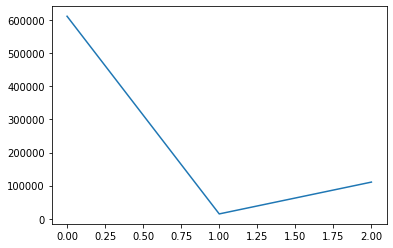

In [ ]:
plt.plot(runtime_df)